# Is black scholes model only expected value? 
- We know the current value of an asset, 
- We know (or we assume) its volatility and drift 
- Thus the value of an option should be the same as teh expected value of the option given by multiplyng the expected price by a probability of that outcome right? 

In [175]:
import numpy as np
from scipy.stats import norm
from scipy.stats import lognorm
import matplotlib.pyplot as plt

Berk and DeMarzo do not have the risk in d1... 


In [73]:
def black_scholes(spot, strike, time, volatility, risk): 
    
    d1 = 1.0/(volatility*np.sqrt(time))*(np.log(spot/strike)+(risk+volatility*volatility/2)*time)
    print(d1)
    d2 = d1-volatility*np.sqrt(time)
    print(d2)

    PV_strike = strike*np.exp(-risk*time)
    print(PV_strike)

    CDF_d1 = norm.cdf(d1)
    CDF_d2 = norm.cdf(d2)
    print(CDF_d1)
    print(CDF_d2)
    
    call_value = CDF_d1*spot-CDF_d2*PV_strike
    return call_value

In [82]:
spot = 10
strike = 10
time = 1.0
volatility = 0.0001

risk = 0.0001

In [83]:
black_scholes(spot, strike, time, volatility, risk)

1.00005
0.9999500000000001
9.999000049998333
0.8413568443023055
0.8413326472298537


0.001083261306517258

## Expected value 

In [86]:
current_log = np.log(spot)

In [89]:
np.random.normal(current_log, volatility,1000)

NameError: name 'plot' is not defined

In [ ]:
from scipy.integrate import quad
def integrand(x, mu, sigma):
    return 1/np.sqrt(2.0*np.pi*sigma*sigma)*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

Lognormal distribution
Car dealership price is 6M and volatility is 40%. Lognormally distributed. What is the expected value when the investment costs 5M? 

In [763]:
from scipy.integrate import quad
def integrand(x, mu, sigma):
    return lognorm.pdf(x,sigma,scale = mu)*x

In [813]:
mu = np.log(6)
sigma = 0.5
price = 5

Expected value when option is exercised vs expected value when it is not. 

In [817]:
I = quad(integrand, price, 200, args=(np.exp(mu),sigma))
(I[0]+lognorm.cdf(5,sigma, scale = np.exp(mu))*price)-0.6

6.67095207881498

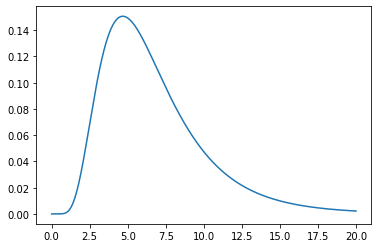

In [816]:
plt.plot(l,lognorm.pdf(l,sigma,scale = np.exp(mu)))

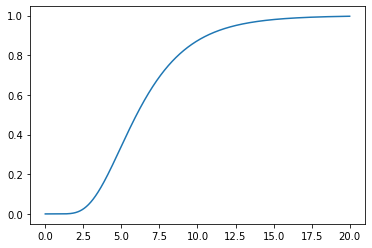

In [676]:
plt.plot(l,lognorm.cdf(l,sigma,scale = np.exp(mu)))

# Conclusion 
- In my oppinion it makes sense. I know what is the value of the stock now, I know its distribution, ergo I know the expected value. 
- Now I do not understand why Black and Scholes got a Nobel Prize... 